# The Development of a Predictive Modelling Approach for the Forecasting of Water pumps' Functionality: Tanzania Case Study


## Author 1: Karim Elkobrossy
## Author 2: Gaafar Mustafa

Installation of Dependencies

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

Data Importing and Exploration

In [79]:
df_Features = pd.read_csv('Training Features.csv', index_col=0)
df_Labels = pd.read_csv('Training Labels.csv', index_col=0)
print(df_Features.shape)
print(df_Features.head())
print(df_Labels.shape)
print(df_Labels.head())

(59400, 39)
       amount_tsh date_recorded        funder  gps_height     installer  \
id                                                                        
69572      6000.0    2011-03-14         Roman        1390         Roman   
8776          0.0    2013-03-06       Grumeti        1399       GRUMETI   
34310        25.0    2013-02-25  Lottery Club         686  World vision   
67743         0.0    2013-01-28        Unicef         263        UNICEF   
19728         0.0    2011-07-13   Action In A           0       Artisan   

       longitude   latitude              wpt_name  num_private  \
id                                                               
69572  34.938093  -9.856322                  none            0   
8776   34.698766  -2.147466              Zahanati            0   
34310  37.460664  -3.821329           Kwa Mahundi            0   
67743  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
19728  31.130847  -1.825359               Shuleni            0   


In [80]:
# Merging features with target column in a whole dataframe
df = pd.merge(df_Features, df_Labels, on='id')
original_df = df.copy(deep=True)
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# 1) Exploratory Data Analysis
## This graph shows that:
### 1) VWC has the most functional and non functional pumps
### 2) Most of the waterpoints are operated by VWC (vast majority)
### 3) This could introduce bias in the data as most samples are collected from a specific operator


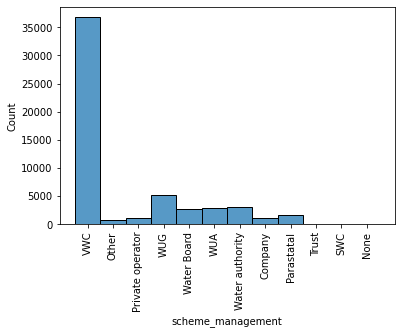

In [81]:
# Histogram of scheme_management
sns.histplot(data=df, x='scheme_management')
plt.xticks(rotation='vertical')
plt.show()

### This graph shows the breakdown of different labels for every operator.

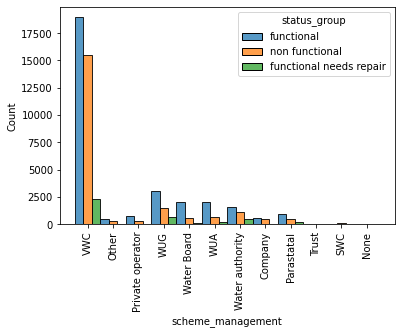

In [82]:
sns.histplot(data=df, x='scheme_management', hue='status_group', multiple='dodge')
plt.xticks(rotation='vertical')
plt.show()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


Text(0, 0.5, '%')

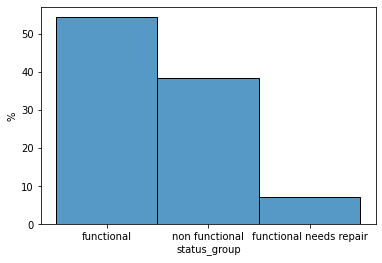

In [83]:
import seaborn as sns
# Distribution of classes
sns.histplot(data=df, x='status_group', stat='percent')
print(df['status_group'].value_counts())
plt.xlabel("status_group")
plt.ylabel("%")

# 2) Data preprocessing
### 2.1 Duplicates


In [84]:
# Closer look at the duplicates
# Same DATE and Values for columns -> duplicates
# This is just one example of the duplicates present
df.loc[[18713, 29553]]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18713,0.0,2011-07-13,He,0,HE,31.61953,-1.793342,Kahindu,0,Lake Victoria,Ikondoa,Kagera,18,3,Muleba,Ikondo,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,improved spring,improved spring,functional
29553,0.0,2011-07-13,He,0,HE,31.61953,-1.793342,Kahindu,0,Lake Victoria,Ikondoa,Kagera,18,3,Muleba,Ikondo,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,improved spring,improved spring,functional


In [85]:
# Drop the duplicates
df = df.drop_duplicates()

### 2.2 Outliers

In [86]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59364.000000,59364.000000,59364.000000,5.936400e+04,59364.000000,59364.000000,59364.000000,59364.000000,59364.000000
mean,317.843017,668.702513,34.097560,-5.709463e+00,0.474429,15.295516,5.631494,180.019086,1301.441227
std,2998.473133,693.131013,6.517065,2.943608e+00,12.239934,17.592619,9.636138,471.604294,951.369704
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.095187,-8.541904e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,370.000000,34.910318,-5.023822e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1320.000000,37.179490,-3.326918e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


##### Outliers in gps_height, longitude and latitude -> Leave them (probably NOT outliers)
##### Possible outliers in amount_tsh

In [87]:
# Exploring possible outliers in amount_tsh
df.loc[df['amount_tsh'] > df['amount_tsh'].quantile(0.9999)]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15191,120000.0,2013-03-15,Villagers,1760,Villagers,37.882965,-4.168251,Pentecoste Church,17,Pangani,Zahanati,Kilimanjaro,3,3,Same,Mhezi,120,True,GeoData Consultants Ltd,Water authority,Kwanamdingiriri,NaN,2011,gravity,gravity,gravity,wug,user-group,other,other,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
54154,138000.0,2011-03-22,Parastatal,-7,Da,38.910446,-6.462283,College Of Library,0,Wami / Ruvu,Ukuni,Pwani,6,1,Bagamoyo,Dunda,587,False,GeoData Consultants Ltd,Company,Bagamoyo wate,True,2007,ksb,submersible,submersible,parastatal,parastatal,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
41564,350000.0,2013-03-01,NaN,1558,NaN,34.840029,-4.542934,Mtinko Primary,0,Internal,Mlimani,Singida,13,2,Singida Rural,Mtinko,886,True,GeoData Consultants Ltd,VWC,K,NaN,1990,mono,mono,motorpump,vwc,user-group,pay annually,annually,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
4128,250000.0,2011-03-04,Ded,285,WU,38.410852,-6.117538,Miono Dispensary,0,Wami / Ruvu,Kipera B,Pwani,6,1,Bagamoyo,Miono,80,True,GeoData Consultants Ltd,WUA,Chalinze wate,True,2003,ksb,submersible,submersible,parastatal,parastatal,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
7860,200000.0,2011-08-08,Government Of Tanzania,98,Government,38.978067,-5.122702,Shuleni,0,Pangani,Pongwe Kaskazini,Tanga,4,4,Tanga,Pongwe,800,True,GeoData Consultants Ltd,VWC,Pongwe Water Supply,True,0,submersible,submersible,submersible,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
70107,170000.0,2011-03-16,Owner Pingo C,127,WU,38.420467,-6.640090,Chuo Cha Ualimu,0,Wami / Ruvu,Madukani,Pwani,6,1,Bagamoyo,Chalinze,150,False,GeoData Consultants Ltd,WUA,Chalinze wate,True,2008,ksb,submersible,submersible,parastatal,parastatal,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional


##### Question: What is nvm_private?
##### Two observations:
##### 1) There are possible outliers in num_private
##### 2) Most of the values in num_private are zeros

<AxesSubplot:xlabel='num_private', ylabel='Count'>

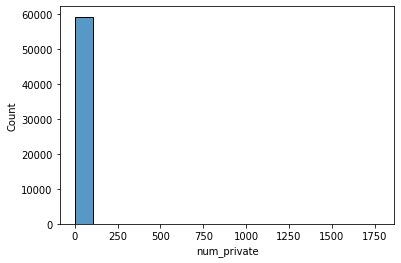

In [88]:
sns.histplot(data=df, x='num_private')

### Apply the train/test split before preprocessing to remove bias

In [89]:
X = df.drop(columns=['status_group']) 
y = df['status_group'] 

# split the dataframe into training, validation and test sets
# random_state is set to 42 for reproducibility
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

print(X_train_val.shape)
print(X_test.shape)
print(y_train_val.shape)
print(y_test.shape)
print(df.shape)

X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')

# For simplicity in the code, we will now rename the train/validation dataset as df
df = pd.merge(X_train_val, y_train_val, on='id')

(53427, 39)
(5937, 39)
(53427,)
(5937,)
(59364, 40)


### Checking Missing Data

In [90]:
# Columns containing null values
df.columns[df.isnull().any()]

Index(['funder', 'installer', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit'],
      dtype='object')

In [91]:
num_zeros = df.eq(0).sum()
print("Number of zeros in each column:")
print(num_zeros)

Number of zeros in each column:
amount_tsh               37415
date_recorded                0
funder                       0
gps_height               18386
installer                    0
longitude                 1609
latitude                     0
wpt_name                     0
num_private              52741
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code               22
lga                          0
ward                         0
population               19217
public_meeting            4573
recorded_by                  0
scheme_management            0
scheme_name                  0
permit                   15739
construction_year        18613
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality

### Preprocessing "permit" column

In [92]:
# Unique values present
df['permit'].unique()

array([True, nan, False], dtype=object)

In [93]:
# Count of values
df['permit'].value_counts()

True     34942
False    15739
Name: permit, dtype: int64

### Observation: Close to 70% are True -> We could substitute by most frequent (True)

### Future work : Try KNN then PCA then cluster into two gps

In [94]:
# Replace by mode
df['permit'].fillna(df['permit'].mode()[0], inplace=True)
df['permit'].value_counts()

True     37688
False    15739
Name: permit, dtype: int64

### The following graph plots the number of missing values as well as unique value count for some of the columns.

Column name: funder
1798
Column name: installer
2038
Column name: subvillage
18281
Column name: public_meeting
2
Column name: scheme_management
12
Column name: scheme_name
2619


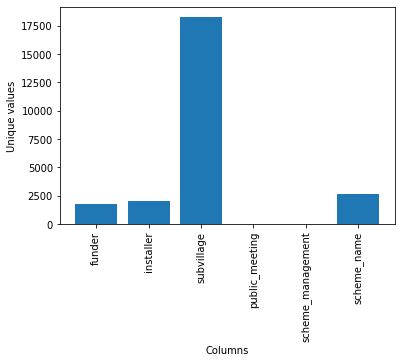

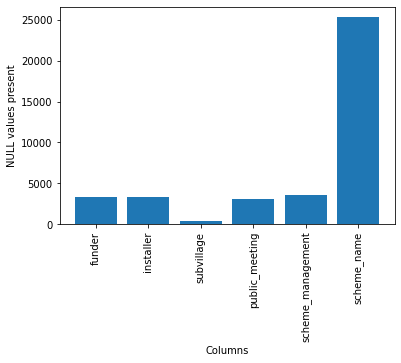

In [95]:
# Checking the null and unique values for columns having null values
numerical = ["amount_tsh", "gps_height", "longitude", "latitude", "num_private", "region_code", "district_code", "population", "construction_year"] 
x=[]
y=[]
y2=[]
for col in df.keys():
    if col not in numerical and df[df[col].isna()].shape[0]!=0:
        print(f"Column name: {col}")
        print(df[col].describe()['unique'])
        x.append(col)
        y.append(df[col].describe()['unique'])
        y2.append(df[df[col].isna()].shape[0])
plt.xlabel("Columns")
plt.ylabel("Unique values")
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

plt.bar(x, y2)
plt.xlabel("Columns")
plt.ylabel("NULL values present")
plt.xticks(rotation=90)
plt.show()


### Graph observation: "scheme_name" column has ALOT of MISSING values compared to others ~30000 missing out of 50000 -> possibly drop afterwards

# "funder" and "installer" columns have lots of common names per instance

In [96]:
# making both columns lower case
df['funder'] = df['funder'].str.lower()
df['installer'] = df['installer'].str.lower()

### Make new column for common funder and installer (half of records has same funder and installer and other half don’t) -> ADD new BINARY column specifying this and remove funder and installer since they have a lot of unique names (could hurt one hot encoding in computation)

In [97]:
# Funder and installer both have 0 in the same rows
# These rows has unique region
# Both columns have NAN
condition =  (df['installer'].isna()) & (df['funder'].isna())
print(f'Both columns have NAN {df[condition].shape}')

# ONLY funder have NAN
condition =  (df['funder'].isna())
print(f'ONLY funder have NAN {df[condition].shape}')

# ONLY installer have NAN
condition =  (df['installer'].isna())
print(f'ONLY installer have NAN {df[condition].shape}')


Both columns have NAN (3208, 40)
ONLY funder have NAN (3256, 40)
ONLY installer have NAN (3275, 40)


In [98]:
print(f"{len(df[df['installer']==df['funder']]) * 100 / len(df[df['installer']!=df['funder']])} % have same funder and installer")
df[['funder', 'installer']] = df[['funder', 'installer']].fillna("0")
df['same_funder_installer'] = (df['funder']==df['installer']).replace({True: 1, False: 0})
df.drop(columns=['funder', 'installer'], axis = 1, inplace=True)

46.85412715428383 % have same funder and installer


### Initial issues with features:
- amount tsh has a very large number of zero value 
- num private has a very large number of zero values(not-useful) 
- Outliers in Latitude and Longitude Lines
- district_code, population and construction year have zero values
- redundant features in extraction, payment, quantity, source, and waterpoint type
- funder, installer, subvillage, public meeting, scheme management, scheme name, and permit have N/A values.

### dealing with "amount_tsh" zero values

In [99]:
#Removing outliers
print(df['amount_tsh'].max())
df.loc[df['amount_tsh'] > df['amount_tsh'].quantile(0.95), 'amount_tsh'] = np.nan
print(df['amount_tsh'].max())
print(df['amount_tsh'].mean())

350000.0
1200.0
77.98974718825447


### "amount_tsh" is disregarded for the following reasons:
- most of the data is missing
- Even after disregarding the missing values, there is a very large overlap when compared to target classes

In [100]:
df.drop('amount_tsh', axis=1, inplace=True)

### Preprocessing "num_private" column -> Drop the entire column

In [101]:
# It's mostly zeros, hence, it's dropped
df.drop('num_private', axis=1, inplace=True)

### Transformation of Categorical Data

In [102]:
#Unuseful and redundant features are dropped
df = df.drop(['date_recorded','recorded_by','extraction_type_group','extraction_type_class','payment_type', 'water_quality','quantity_group','source_type', 'waterpoint_type_group'], axis = 1)

In [103]:
# Null values
df.isnull().sum()

gps_height                   0
longitude                    0
latitude                     0
wpt_name                     0
basin                        0
subvillage                 334
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3023
scheme_management         3506
scheme_name              25349
permit                       0
construction_year            0
extraction_type              0
management                   0
management_group             0
payment                      0
quality_group                0
quantity                     0
source                       0
source_class                 0
waterpoint_type              0
status_group                 0
same_funder_installer        0
dtype: int64

In [104]:
#features with more than 5 unique classes are label encoded
# 0 replaced with nan to overcome an error afterwards
#df[['funder', 'installer']] = df[['funder', 'installer']].replace(0, np.nan)
# nans are replaced with string '-1' chosen arbitrarily in order to overcome the nan error while encoding
df[['subvillage', 'scheme_management', 'scheme_name']] = df[['subvillage', 'scheme_management', 'scheme_name']].replace(np.nan, '-1')
label_encoding_columns = ['subvillage', 'scheme_management', 'scheme_name', 'wpt_name', 'region', 'lga', 'ward','extraction_type','management', 'basin','management_group', 'payment','quality_group','source','waterpoint_type']
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df[label_encoding_columns] = ordinal_encoder.fit_transform(df[label_encoding_columns])

In [105]:
df[label_encoding_columns].head()

,subvillage,scheme_management,scheme_name,wpt_name,region,lga,ward,extraction_type,management,basin,management_group,payment,quality_group,source,waterpoint_type
id,,,,,,,,,,,,,,,
33534,3085.0,8.0,0.0,3919.0,10.0,60.0,310.0,3.0,11.0,2.0,4.0,3.0,2.0,6.0,1.0
45061,7342.0,8.0,968.0,31513.0,18.0,109.0,1610.0,0.0,7.0,0.0,4.0,4.0,2.0,3.0,4.0
1345,16914.0,12.0,1949.0,32832.0,6.0,74.0,37.0,3.0,8.0,5.0,0.0,4.0,2.0,8.0,1.0
7341,13632.0,11.0,168.0,28829.0,12.0,116.0,178.0,14.0,7.0,7.0,4.0,4.0,2.0,3.0,1.0
72028,136.0,9.0,2560.0,8821.0,3.0,91.0,384.0,3.0,10.0,6.0,4.0,3.0,2.0,6.0,1.0


In [106]:
one_hot_columns = ['public_meeting','permit','source_class','quantity']
one_hot = OneHotEncoder(dtype=np.uint8, handle_unknown='ignore')
encoded_arr = one_hot.fit_transform(df[one_hot_columns])
col_names = one_hot.get_feature_names_out(one_hot_columns) 
appropriate_encoded_cols = pd.DataFrame(encoded_arr.toarray(), columns=col_names)
appropriate_encoded_cols.drop(columns=['public_meeting_nan'], inplace=True)
# Drop previous columns and add new one hot encoded columns instead
# Notice some of the columns will contain colnamne_nan. These columns are dropped later
df = pd.concat([df.drop(columns=one_hot_columns, axis=1).reset_index(drop=True), appropriate_encoded_cols], axis=1)

In [107]:
# 2nd approach was to one hot encode instead of using label encoding -> not feasible, computational overhead

#previously_label_encoding_columns = ['scheme_management', 'wpt_name', 'region', 'lga', 'ward','extraction_type','management', 'basin','management_group', 'payment','quality_group','source','waterpoint_type']
#one_hot_columns = ['public_meeting','permit','source_class','quantity'] + previous_label_encoding_columns

#one_hot = OneHotEncoder(dtype=np.uint8, handle_unknown='ignore')
#encoded_arr = one_hot.fit_transform(df[Aone_hot_columns])
#col_names = one_hot.get_feature_names_out(one_hot_columns) 
#appropriate_encoded_cols = pd.DataFrame(encoded_arr.toarray(), columns=col_names)
#appropriate_encoded_cols.drop(columns=['public_meeting_nan', 'permit_nan'], inplace=True)
# Drop previous columns and add new one hot encoded columns instead
# Notice some of the columns will contain colnamne_nan. These columns are dropped later
#df = pd.concat([df.drop(columns=one_hot_columns, axis=1).reset_index(drop=True), appropriate_encoded_cols], axis=1)

### Dealing with missing district code values

In [108]:
# there are a few missing values. By simple logic and looking a data, we can infer that values which have similar lga values would belong to the same district and have the same district code
print((df['district_code'] == 0).sum())

lga_dict = df[df['district_code'] != 0].groupby('lga')['district_code'].median().to_dict()
df['district_code'] = df.apply(lambda row: lga_dict[row['lga']] if row['district_code'] == 0 else row['district_code'], axis=1)

print((df['district_code'] == 0).sum())

22
0


### Exploring Intitial Correlations

In [109]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.corr())

                          gps_height  longitude  latitude  wpt_name     basin  \
gps_height                  1.000000   0.146952 -0.035565  0.056867 -0.162990   
longitude                   0.146952   1.000000 -0.425245 -0.016418  0.217595   
latitude                   -0.035565  -0.425245  1.000000 -0.061782 -0.220777   
wpt_name                    0.056867  -0.016418 -0.061782  1.000000 -0.013697   
basin                      -0.162990   0.217595 -0.220777 -0.013697  1.000000   
subvillage                  0.020044   0.002107 -0.006900  0.090638  0.029448   
region                     -0.325104  -0.142066 -0.026053 -0.044645 -0.114057   
region_code                -0.182839   0.035200 -0.221805  0.012670  0.140774   
district_code              -0.170967   0.152014 -0.201924 -0.004314  0.189884   
lga                         0.137441   0.227912 -0.269362 -0.040463 -0.005667   
ward                        0.042627   0.037018  0.006426 -0.002051  0.040710   
population                  

### Dealing with "Longitude" and "Latitude" outliers

In [110]:
# Print out latitude and longitude outside range of tanzania
condition = ~(( (df['longitude'] >= 29.34) & (df['longitude'] <= 40.45) ) & ( (df['latitude'] >= -11.75) & (df['latitude'] <= -0.99) ))
print(df[condition].shape)
print(df.shape)
df[condition][['latitude', 'longitude']]

(1609, 36)
(53427, 36)


,latitude,longitude
13,-2.000000e-08,0.0
16,-2.000000e-08,0.0
22,-2.000000e-08,0.0
25,-2.000000e-08,0.0
68,-2.000000e-08,0.0
86,-2.000000e-08,0.0
154,-2.000000e-08,0.0
176,-2.000000e-08,0.0
180,-2.000000e-08,0.0
209,-2.000000e-08,0.0


In [111]:
# Missing numbers in latitude are denoted by -2e-8 -> substitute by np.nan
df['latitude'].replace(-0.00000002, np.nan, inplace=True)
# maximum/minimum longitude and latitude for tanzania -> Internet data
# Any value which is out of tanzania's real borders is an outlier or an error
tanzania_lat_range = [-11.7, -0.99]
tanzania_lon_range = [29.34, 40.45]
df.loc[(df['latitude'] < tanzania_lat_range[0]) | (df['latitude'] > tanzania_lat_range[1]), 'latitude'] = np.nan
df.loc[(df['longitude'] < tanzania_lon_range[0]) | (df['longitude'] > tanzania_lon_range[1]), 'longitude'] = np.nan

### Drawing the borders of Tanzania

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

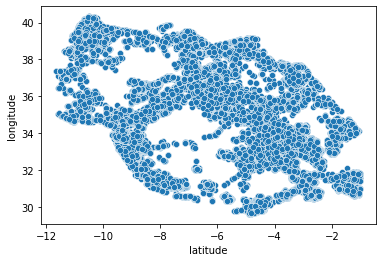

In [112]:
# Drawing the borders of Tanzania
sns.scatterplot(data=df, x='latitude', y='longitude')

### KNN imputation vs Mean imputation

### 1) Longitude imputation

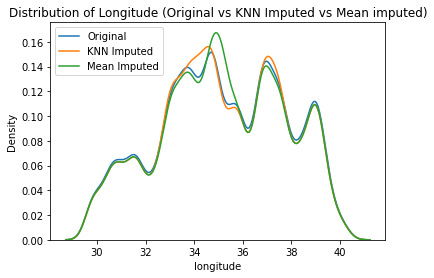

In [113]:
import matplotlib.pyplot as plt

impute_df = df[['longitude','latitude','basin','lga']]
all_cols = ['longitude','latitude','basin','lga']
imputer = KNNImputer(n_neighbors=1)
imputed_longitude = imputer.fit_transform(impute_df)
df_imputed = pd.DataFrame(imputed_longitude, columns=all_cols)
df_imputed_mean = df['longitude'].fillna(df['longitude'].mean())

# Original dist vs KNN Imputed
fig1, ax1 = plt.subplots()
sns.kdeplot(data=df, x='longitude', label='Original', ax=ax1)
sns.kdeplot(data=df_imputed, x='longitude', label='KNN Imputed', ax=ax1)
sns.kdeplot(data=df_imputed_mean, label='Mean Imputed', ax=ax1)
ax1.set_title('Distribution of Longitude (Original vs KNN Imputed vs Mean imputed)')
ax1.legend()
plt.show()

In [37]:
# Assiging longitude column to the new KNN imputed longitude
df['longitude'] = imputed_longitude[:,0]

### 2) Latitude imputation

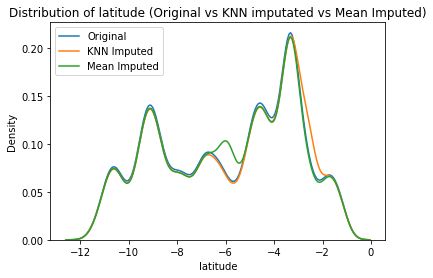

In [38]:
import matplotlib.pyplot as plt

impute_df = df[['latitude','longitude','basin','region_code','district_code','lga']]
all_cols = ['latitude','longitude','basin','region_code','district_code','lga']
imputer = KNNImputer(n_neighbors=1)
imputed_latitude = imputer.fit_transform(impute_df)
df_imputed = pd.DataFrame(imputed_latitude, columns=all_cols)
df_imputed_mean = df['latitude'].fillna(df['latitude'].mean())

# Original dist vs KNN Imputed
fig1, ax1 = plt.subplots()
sns.kdeplot(data=df, x='latitude', label='Original', ax=ax1)
sns.kdeplot(data=df_imputed, x='latitude', label='KNN Imputed', ax=ax1)
sns.kdeplot(data=df_imputed_mean, label='Mean Imputed', ax=ax1)
ax1.set_title('Distribution of latitude (Original vs KNN imputated vs Mean Imputed)')
ax1.legend()
plt.show()


In [39]:
# Assiging latitude column to the new KNN imputed longitude
df['latitude'] = imputed_latitude[:,0]

##### Dealing with Missing Construction Year Values
##### 18613 records has construction year of 0 which needs to be imputated. What does 0 mean?

In [40]:
df.loc[df['construction_year']==0].shape

(18613, 36)

### 3) Construction year imputation

#### Here we can see that the mean imputation totally skewed the distribution

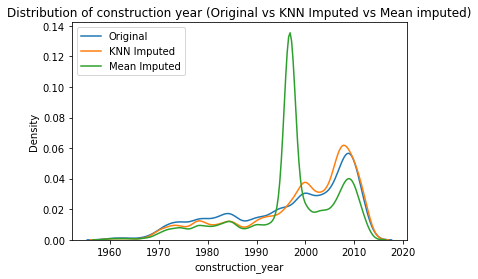

In [41]:
import matplotlib.pyplot as plt

# Replace the 0 values with np.nan
df['construction_year'] = df['construction_year'].replace(0, np.nan)
impute_df = df[['construction_year', 'region','lga','management_group','quantity_dry', 'quantity_enough']]
all_cols = ['construction_year', 'region','lga','management_group','quantity_dry', 'quantity_enough']
imputer = KNNImputer(n_neighbors=1)
imputed_construction_year = imputer.fit_transform(impute_df)
df_imputed = pd.DataFrame(imputed_construction_year, columns=all_cols)
df_imputed_mean = df['construction_year'].fillna(df['construction_year'].mean())

# Original dist vs KNN Imputed
fig1, ax1 = plt.subplots()
sns.kdeplot(data=df, x='construction_year', label='Original', ax=ax1)
sns.kdeplot(data=df_imputed, x='construction_year', label='KNN Imputed', ax=ax1)
sns.kdeplot(data=df_imputed_mean, label='Mean Imputed', ax=ax1)
ax1.set_title('Distribution of construction year (Original vs KNN Imputed vs Mean imputed)')
ax1.legend()

plt.show()


In [42]:
# Assiging construction_year column to the new KNN imputed longitude
df['construction_year'] = imputed_construction_year[:,0]

### 4) Population imputation

##### Remove ONE extreme outlier in POPULATION (30500)

In [43]:
df['population'].replace(0, np.nan, inplace=True)
# Remove one EXTREME outlier
df = df.drop(df[df['population'] == 30500].index)
df= df.reset_index(drop=True)
#Replace 1 in population by np.nan as it seems to be a mistake as well as affecting the distribution
df['population'].replace(1, np.nan, inplace=True)
# Applying correlation to see which variables are closely correlated to the population feature
df.corr()['population'].sort_values(ascending=False)

population                  1.000000
waterpoint_type             0.128829
region_code                 0.113455
extraction_type             0.112068
region                      0.093593
district_code               0.076179
same_funder_installer       0.072098
permit_False                0.067361
quality_group               0.061711
latitude                    0.048745
public_meeting_False        0.046807
ward                        0.027142
quantity_insufficient       0.023899
source_class_groundwater    0.019455
quantity_unknown            0.017934
wpt_name                    0.014682
quantity_seasonal           0.011773
subvillage                  0.000551
construction_year           0.000402
lga                        -0.001732
quantity_dry               -0.002750
source_class_unknown       -0.006979
source_class_surface       -0.018398
basin                      -0.019313
payment                    -0.019598
management_group           -0.021067
public_meeting_True        -0.025483
q

## Distribution of population before and after imputation

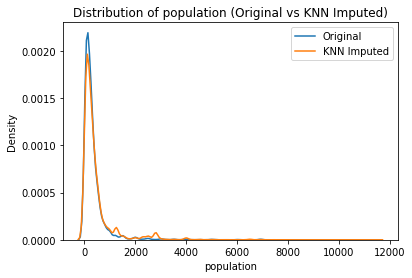

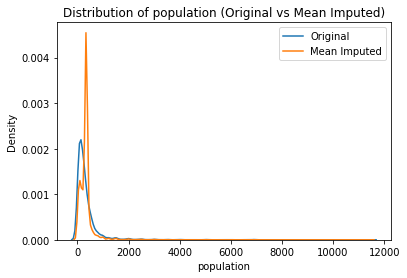

In [44]:
import matplotlib.pyplot as plt

impute_df = df[['population', 'waterpoint_type', 'extraction_type', 'source', 'longitude', 'region_code']]
all_cols = ['population', 'waterpoint_type', 'extraction_type', 'source', 'longitude', 'region_code']
knn_imputer = KNNImputer(n_neighbors=1)
imputed_pop = knn_imputer.fit_transform(impute_df)
df_imputed = pd.DataFrame(imputed_pop, columns=all_cols)
df_imputed_mean = df['population'].fillna(df['population'].mean())

# Original dist vs KNN Imputed
fig1, ax1 = plt.subplots()
sns.kdeplot(data=df, x='population', label='Original', ax=ax1)
sns.kdeplot(data=df_imputed, x='population', label='KNN Imputed', ax=ax1)
ax1.set_title('Distribution of population (Original vs KNN Imputed)')
ax1.legend()

# Original dist vs Mean Imputed
fig2, ax2 = plt.subplots()
sns.kdeplot(data=df, x='population', label='Original', ax=ax2)
sns.kdeplot(data=df_imputed_mean, label='Mean Imputed', ax=ax2)
ax2.set_title('Distribution of population (Original vs Mean Imputed)')
ax2.legend()

plt.show()


### For a skewed distribution, a logarithmic function is applied to make it similar to a normal distribution

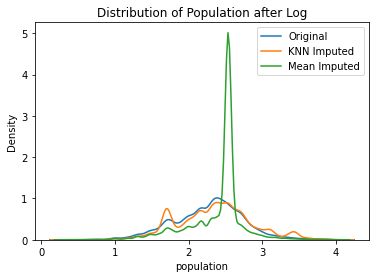

In [45]:
import matplotlib.pyplot as plt

log_df = np.log10(df['population'])
log_df_imputed = np.log10(df_imputed['population'])
log_df_imputed_mean = np.log10(df_imputed_mean)

sns.kdeplot(data=log_df, label='Original')
sns.kdeplot(data=log_df_imputed, label='KNN Imputed')
sns.kdeplot(data=log_df_imputed_mean, label='Mean Imputed')
plt.title('Distribution of Population after Log')
plt.legend()
plt.show()


In [46]:
#This was missing. Assigning of imputed population values after applying log transformation
df['population'] = np.log10(imputed_pop[:,0])

### Exploring Correlations

In [47]:
df_corr = df.copy(deep=True)
df_corr['status_group'] = LabelEncoder().fit_transform(df['status_group'])
df_corr.corr()
print(df_corr.corr())

                          gps_height  longitude  latitude  wpt_name     basin  \
gps_height                  1.000000   0.146962 -0.010541  0.056877 -0.162987   
longitude                   0.146962   1.000000 -0.299581 -0.016427  0.217591   
latitude                   -0.010541  -0.299581  1.000000 -0.066338 -0.228654   
wpt_name                    0.056877  -0.016427 -0.066338  1.000000 -0.013702   
basin                      -0.162987   0.217591 -0.228654 -0.013702  1.000000   
subvillage                  0.020049   0.002102 -0.011096  0.090634  0.029445   
region                     -0.325092  -0.142093 -0.052091 -0.044668 -0.114072   
region_code                -0.182849   0.035209 -0.235184  0.012678  0.140779   
district_code              -0.170971   0.152019 -0.201638 -0.004311  0.189886   
lga                         0.137449   0.227906 -0.246617 -0.040470 -0.005671   
ward                        0.042628   0.037017  0.008742 -0.002052  0.040710   
population                 -

### The above data correlation shows the following:
- Funder and installer have a strong correlation, KNN imputation could be used to impute the data between the two features and then only one feature could be used(if significant).
- District_code and region_code have a strong correlation. Only one could be used
- Basin and Longitude have a strong correlation. Only one could be used
- Scheme_mangemet and management have a strong correlation, hence scheme management could be reomved as it already has missing values that were imputed.
- Scheme name and waterpoint_type have a strong correlation, hence, Scheme name could be removed as it has a large number of missing values.
- The new feature-engineered column "same_funder_installer" has low correlation with the target -> Remove it

Feature Reduction

In [48]:
df = df.drop(['same_funder_installer', 'basin' , 'subvillage', 'district_code','scheme_management', 'scheme_name'], axis = 1)

## Now we are selecting top 3 features from a sub list of features along other hypothesis-based features

In [49]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
# nans are replaced with string '-1' chosen arbitrarily in order to overcome the nan error while encoding
df[['management', 'management_group', 'payment']] = df[['management', 'management_group', 'payment']].replace(np.nan, '0')
sub_features = df[['wpt_name','lga','ward', 'management','management_group','payment','public_meeting_False','public_meeting_True','permit_False','permit_True']]
y = df['status_group']


feature_selection_algorithms = [chi2, mutual_info_classif]
dict_names = {chi2: "Chi Squared", mutual_info_classif: "Mutual Information"}
for technique in feature_selection_algorithms:
    selector = SelectKBest(technique, k=3)
    # Array of best features
    X_best_features = selector.fit_transform(sub_features, y)

    # print the scores and p-values for each feature
    print(f"Column scores for {dict_names[technique]} by same order: {selector.scores_}")
    #print(selector.pvalues_)

    # print the indices of the selected features
    indices_best_cols = selector.get_support(indices=True)
    print(f'Best 3 columns for {dict_names[technique]}: {sub_features.columns[indices_best_cols].tolist()}')

Column scores for Chi Squared by same order: [1.53027029e+05 8.26372993e+03 2.50623911e+03 1.55563660e+02
 3.17807729e+01 7.87282287e+02 2.21826056e+02 4.07451933e+01
 4.31642672e+01 1.80248153e+01]
Best 3 columns for Chi Squared: ['wpt_name', 'lga', 'ward']
Column scores for Mutual Information by same order: [0.03899352 0.09342469 0.1850923  0.02177397 0.00448769 0.0337199
 0.         0.01130994 0.00116413 0.00126694]
Best 3 columns for Mutual Information: ['wpt_name', 'lga', 'ward']


In [50]:
df.head()

,gps_height,longitude,latitude,wpt_name,region,region_code,lga,ward,population,construction_year,extraction_type,management,management_group,payment,quality_group,source,waterpoint_type,status_group,public_meeting_False,public_meeting_True,permit_False,permit_True,source_class_groundwater,source_class_surface,source_class_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,0,33.530951,-8.932164,3919.0,10.0,12,60.0,310.0,1.698970,2007.0,3.0,11.0,4.0,3.0,2.0,6.0,1.0,functional,0,1,0,1,0,1,0,0,1,0,0,0
1,1390,35.078757,-4.836854,31513.0,18.0,13,109.0,1610.0,2.778151,2000.0,0.0,7.0,4.0,4.0,2.0,3.0,4.0,functional,0,1,0,1,1,0,0,0,0,1,0,0
2,819,37.338562,-3.356901,32832.0,6.0,3,74.0,37.0,1.544068,2008.0,3.0,8.0,0.0,4.0,2.0,8.0,1.0,functional,0,1,0,1,1,0,0,0,0,1,0,0
3,413,39.452542,-10.841298,28829.0,12.0,9,116.0,178.0,2.494155,1982.0,14.0,7.0,4.0,4.0,2.0,3.0,1.0,functional,0,1,0,1,1,0,0,0,0,0,1,0
4,1771,34.561914,-9.158895,8821.0,3.0,11,91.0,384.0,1.633468,2006.0,3.0,10.0,4.0,3.0,2.0,6.0,1.0,functional,0,1,0,1,0,1,0,0,1,0,0,0


### One-hot encoding target "status_group"

In [51]:
one_hot_target = OneHotEncoder(dtype=np.uint8, handle_unknown='ignore')
status_group_2d = np.array(df['status_group']).reshape(-1, 1)
encoded_arr = one_hot_target.fit_transform(status_group_2d)
col_names = one_hot_target.get_feature_names_out()
appropriate_encoded_cols = pd.DataFrame(encoded_arr.toarray(), columns=col_names)
# Drop previous columns and add new one hot encoded columns instead
# Notice some of the columns will contain colnamne_nan. These columns are dropped later
original_target = df['status_group']
original_target.to_csv('original_target.csv', index=False)
df = pd.concat([df.drop(columns=['status_group'], axis=1).reset_index(drop=True), appropriate_encoded_cols], axis=1)
df.rename(columns={"x0_functional": "functional", "x0_functional needs repair": "functional needs repair", "x0_non functional": "non functional"}, inplace=True)

In [52]:
df.head()

,gps_height,longitude,latitude,wpt_name,region,region_code,lga,ward,population,construction_year,extraction_type,management,management_group,payment,quality_group,source,waterpoint_type,public_meeting_False,public_meeting_True,permit_False,permit_True,source_class_groundwater,source_class_surface,source_class_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,functional,functional needs repair,non functional
0,0,33.530951,-8.932164,3919.0,10.0,12,60.0,310.0,1.698970,2007.0,3.0,11.0,4.0,3.0,2.0,6.0,1.0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0
1,1390,35.078757,-4.836854,31513.0,18.0,13,109.0,1610.0,2.778151,2000.0,0.0,7.0,4.0,4.0,2.0,3.0,4.0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0
2,819,37.338562,-3.356901,32832.0,6.0,3,74.0,37.0,1.544068,2008.0,3.0,8.0,0.0,4.0,2.0,8.0,1.0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0
3,413,39.452542,-10.841298,28829.0,12.0,9,116.0,178.0,2.494155,1982.0,14.0,7.0,4.0,4.0,2.0,3.0,1.0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0
4,1771,34.561914,-9.158895,8821.0,3.0,11,91.0,384.0,1.633468,2006.0,3.0,10.0,4.0,3.0,2.0,6.0,1.0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0


In [53]:
#Features that have very weak correlation with the target features are dropped(less of 10% approximately)
# wpt_name, subvillage, ward to be dropped despite having good chi square scores because they have a lot of unique values
# payment and lga are not dropped
df_final = df.drop(['wpt_name', 'ward', 'latitude', 'population', 'management','management_group','public_meeting_False','public_meeting_True','permit_False','permit_True'], axis = 1)
df_final.shape

(53426, 22)

### "gps_height", "longitude" and "construction_year" are numerical columns and they will be scaled

In [54]:
min_max_scaler = MinMaxScaler()
scaling_cols = ['gps_height', 'longitude', 'construction_year']
df_final[scaling_cols] = min_max_scaler.fit_transform(df_final[scaling_cols])
# Convert the label encoded columns to integers in order not to be treated as floats by the oversampling techniques (we want a whole number to be produced in these columns)
specific_columns = ['extraction_type', 'payment', 'quality_group', 'source', 'waterpoint_type', 'region', 'lga']
df_final[specific_columns] = df_final[specific_columns].astype(int)

### Exploring natural clusters within the dataset
#### 1) Apply PCA
#### 2) Apply K-means clustering

In [61]:
X_visualize = df_final.drop(columns=['functional', 'non functional', 'functional needs repair'])
# 1 column only
y_visualize = df_final[['functional', 'non functional', 'functional needs repair']].values.argmax(axis=1)

C:\Users\Nitro 5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 2 clusters, silhouette score is 0.49


C:\Users\Nitro 5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 3 clusters, silhouette score is 0.54


C:\Users\Nitro 5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 4 clusters, silhouette score is 0.48


C:\Users\Nitro 5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 5 clusters, silhouette score is 0.40


C:\Users\Nitro 5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 6 clusters, silhouette score is 0.37


C:\Users\Nitro 5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 7 clusters, silhouette score is 0.37


C:\Users\Nitro 5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 8 clusters, silhouette score is 0.34


C:\Users\Nitro 5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 9 clusters, silhouette score is 0.32


C:\Users\Nitro 5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 10 clusters, silhouette score is 0.32


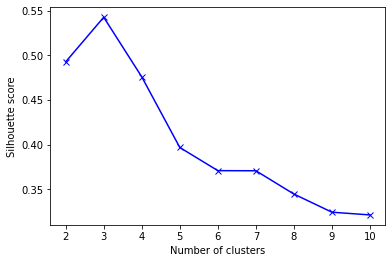

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Experiment with different numbers of clusters and report the silhouette score
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_visualize)
    score = silhouette_score(X_visualize, labels)
    silhouette_scores.append(score)
    print(f"For {k} clusters, silhouette score is {score:.2f}")
# Plot the silhouette scores for different numbers of clusters
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [56]:
df_final.to_csv('preprocessed_data.csv', index=False)

# Imbalanced Data Resampling
### I. SMOTE-Tomek

In [57]:
!pip install imblearn

In [58]:
import imblearn

In [59]:
import pandas as pd
import numpy as np
# We saved the dataframes and test dataset to split this section from the preprocessing (So that we don't run the above cells everytime)
df_final = pd.read_csv('preprocessed_data.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')
original_target = pd.Series(pd.read_csv('original_target.csv').squeeze(), name='status_group')

In [60]:
from imblearn.combine import SMOTETomek
from collections import Counter
import pandas as pd
import numpy as np

classes = ["functional", "functional needs repair", "non functional"]
old_sample_numbers = {c: original_target.value_counts()[c] for c in classes}
ratio_lowest_to_highest = 0.60
# Customized number of labels. An arbitrary ratio of 60% was chosen 
desired_sample_numbers = {"functional": old_sample_numbers["functional"], "non functional": old_sample_numbers["non functional"], "functional needs repair": round(old_sample_numbers["functional"]*ratio_lowest_to_highest)}
smt = SMOTETomek(sampling_strategy=desired_sample_numbers, random_state=42)

X = df_final.drop(columns=['functional', 'functional needs repair', 'non functional'])
y = original_target
X_tomek, y_tomek = smt.fit_resample(X, y)

In [61]:
print("=================BEFORE RESAMPLING==================")
print(original_target.value_counts())
print("=================AFTER RESAMPLING==================")
y_tomek.value_counts()

=================BEFORE RESAMPLING==================
functional                 29031
non functional             20514
functional needs repair     3881
Name: status_group, dtype: int64
=================AFTER RESAMPLING==================


functional                 25492
non functional             17752
functional needs repair    15678
Name: status_group, dtype: int64

In [62]:
# Encode target feature
target_encoded = pd.get_dummies(y_tomek)
df_smotetomek = pd.concat([X_tomek, target_encoded], axis=1)
df_smotetomek.to_csv('SmoteTOMEK_res_data.csv')

### SMOTE-ENN

In [63]:
from imblearn.combine import SMOTEENN

In [64]:
X = df_final.drop(['functional', 'functional needs repair', 'non functional'], axis=1)
y = df_final[['functional', 'functional needs repair', 'non functional']]

In [65]:
Y = np.array(y)
smote_enn = SMOTEENN(random_state=42)
X_enn, y_enn = smote_enn.fit_resample(X, Y)

In [66]:
Y_enn = pd.DataFrame(y_enn, columns=['functional', 'functional needs repair', 'non functional'])
Y_enn.head()

,functional,functional needs repair,non functional
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [67]:
print("=================BEFORE RESAMPLING==================")
counts_before = df_final[['functional', 'functional needs repair', 'non functional']].sum()
print(counts_before )
print("=================AFTER RESAMPLING==================")
counts_after = Y_enn.sum()
print(counts_after)

=================BEFORE RESAMPLING==================
functional                 29031
functional needs repair     3881
non functional             20514
dtype: int64
=================AFTER RESAMPLING==================
functional                 15690
functional needs repair    20227
non functional             18925
dtype: int64


In [68]:
df_enn = pd.concat([X_enn, Y_enn], axis=1)
df_enn.head()

,gps_height,longitude,region,region_code,lga,construction_year,extraction_type,payment,quality_group,source,waterpoint_type,source_class_groundwater,source_class_surface,source_class_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,functional,functional needs repair,non functional
0,0.022238,0.831102,10,12,60,0.886792,3,3,2,6,1,0,1,0,0,1,0,0,0,1,0,0
1,0.512884,0.869466,18,13,109,0.754717,0,4,2,3,4,1,0,0,0,0,1,0,0,1,0,0
2,0.311331,0.925477,6,3,74,0.905660,3,4,2,8,1,1,0,0,0,0,1,0,0,1,0,0
3,0.168020,0.977875,12,9,116,0.415094,14,4,2,3,1,1,0,0,0,0,0,1,0,1,0,0
4,0.647370,0.856655,3,11,91,0.867925,3,3,2,6,1,0,1,0,0,1,0,0,0,1,0,0


In [69]:
df_enn.to_csv('ENN_res_data.csv')

## Now we will split the training from validation datasets. 
## Notice we now have 2 preprocessd datasets to train on

In [70]:
# First split is for smote-tomek preprocessed data
from sklearn.model_selection import train_test_split

df_smotetomek = pd.read_csv('SmoteTOMEK_res_data.csv', index_col=0)
df_enn = pd.read_csv('ENN_res_data.csv', index_col=0)
X_tomek = df_smotetomek.drop(columns=['functional', 'functional needs repair', 'non functional']) 
y_tomek = df_smotetomek[['functional', 'functional needs repair', 'non functional']]
X_train_smotetomek, X_val_smotetomek, y_train_smotetomek, y_val_smotetomek = train_test_split(X_tomek, y_tomek, test_size=0.1, random_state=42)

# Second split is for smote-ENN preprocessed data

X_enn = df_enn.drop(columns=['functional', 'functional needs repair', 'non functional']) 
y_enn = df_enn[['functional', 'functional needs repair', 'non functional']] 
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_enn, y_enn, test_size=0.1, random_state=42)

# Model Development
### Train and evaluate the model-1

In [71]:
!pip install xgboost
import xgboost

In [72]:
# Retrieving index of the maximum value
y_encoded_train_smotetomek = y_train_smotetomek.values.argmax(axis=1)
y_encoded_val_smotetomek = y_val_smotetomek.values.argmax(axis=1) 
y_encoded_train_res = y_train_res.values.argmax(axis=1) 
y_encoded_val_res = y_val_res.values.argmax(axis=1) 

#data['target_encoded'] = y_encoded
y_encoded_train_smotetomek[0:5]
# This mapping is based on the original order of the columns (np.argmax retrieves the max index)
#0 -> functional
#1 -> functional needs repair
#2 -> non functional

array([1, 2, 2, 2, 0], dtype=int64)

In [73]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Assigning a parameter grid for grid search
# Hyperparameter tuning took a very long time and sometimes crashed, so we tested using different set of hyperparameters at a time
param_grid = {
    'max_depth': [15],
    'learning_rate': [0.2],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
}

# Creating two XGBoost models for our 2 resampled datasets
xgb1 = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
xgb2 = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Grid search for first dataset
grid_search = GridSearchCV(estimator=xgb1, param_grid=param_grid, cv=3)
grid_search.fit(X_train_smotetomek, y_encoded_train_smotetomek)

# Grid search for second dataset
grid_search2 = GridSearchCV(estimator=xgb2, param_grid=param_grid, cv=3)
grid_search2.fit(X_train_res, y_encoded_train_res)

# Get the best model and its parameters for the first dataset (smotetomek)
best_xgb = grid_search.best_estimator_
best_params = grid_search.best_params_

# Get the best model and its parameters for the second dataset (smoteenn)
best_xgb2 = grid_search2.best_estimator_
best_params2 = grid_search2.best_params_

# Fit the best model (chosen using the hyperparameters in grid space) on the first training data
best_xgb.fit(X_train_smotetomek, y_encoded_train_smotetomek)

# Fit the best model on the second training data
best_xgb2.fit(X_train_res, y_encoded_train_res)

# Predictions for both models on the validation data
y_pred_tomek = best_xgb.predict(X_val_smotetomek)
y_pred_enn = best_xgb2.predict(X_val_res)

# Evaluate the model
accuracy_tomek = accuracy_score(y_encoded_val_smotetomek, y_pred_tomek)
accuracy_enn = accuracy_score(y_encoded_val_res, y_pred_enn)

accuracy_tomek = accuracy_score(y_encoded_val_smotetomek, y_pred_tomek)
accuracy_enn = accuracy_score(y_encoded_val_res, y_pred_enn)
precision_tomek = precision_score(y_encoded_val_smotetomek, y_pred_tomek, average='macro')
precision_enn = precision_score(y_encoded_val_res, y_pred_enn, average='macro')
recall_tomek = recall_score(y_encoded_val_smotetomek, y_pred_tomek, average='macro')
recall_enn = recall_score(y_encoded_val_res, y_pred_enn, average='macro')

print(f"Validation accuracy (Tomek): {accuracy_tomek}")
print(f"Validation accuracy (ENN): {accuracy_enn}")

print(f"Validation Precision (Tomek): {precision_tomek}")
print(f"Validation Precision (ENN): {precision_enn}")

print(f"Validation Recall (Tomek): {recall_tomek}")
print(f"Validation Recall (ENN): {recall_enn}")

Validation accuracy (Tomek): 0.885796707958595
Validation accuracy (ENN): 0.9784867821330903
Validation Precision (Tomek): 0.8886594892935055
Validation Precision (ENN): 0.9782092559369183
Validation Recall (Tomek): 0.8853120253284659
Validation Recall (ENN): 0.9783007865209674


### Confusion matrices for both models trained on SMOTETOMEK and SMOTEENN respectively using validation dataset

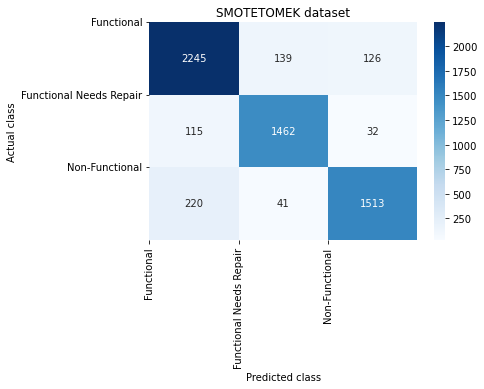

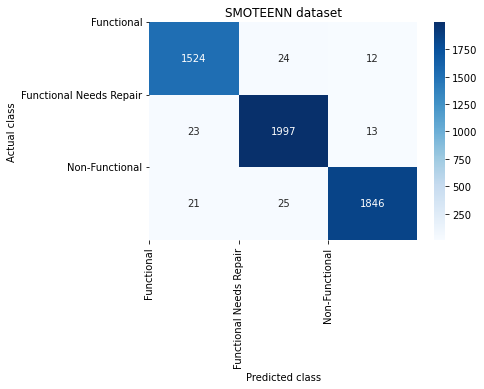

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Initiate a confusion matrix for both datasets
cm_tomek_xgb = confusion_matrix(y_encoded_val_smotetomek, y_pred_tomek)
cm_enn_xgb = confusion_matrix(y_encoded_val_res, y_pred_enn)

labels = ["Functional", "Functional Needs Repair", "Non-Functional"]

# Heatmap for Tomek dataset
sns.heatmap(cm_tomek_xgb, annot=True, cmap="Blues", fmt="d")
plt.title("SMOTETOMEK dataset")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
# Rotated the lables in order not to overlap
plt.xticks(ticks=range(3), labels=labels, rotation=90)
plt.yticks(ticks=range(3), labels=labels, rotation=0)
plt.show()

# Heatmap for ENN dataset
sns.heatmap(cm_enn_xgb, annot=True, cmap="Blues", fmt="d")
plt.title("SMOTEENN dataset")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.xticks(ticks=range(3), labels=labels, rotation=90)
plt.yticks(ticks=range(3), labels=labels, rotation=0)
plt.show()


### Train and Evaluate Model 2

In [ ]:
#Now let's use a grid search technique to select model hyperparametes
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score

def create_model(neurons1=128, neurons2=64, neurons3=32):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=X_train_smotetomek.shape[1], activation='relu'))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dense(neurons3, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {'neurons1': [32, 64, 128, 256],
              'neurons2': [32, 64, 128, 256],
              'neurons3': [16, 32, 64, 128]}
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_smotetomek, y_train_smotetomek)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

In [75]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense



#Early stopping callback for the model to stop if there are no more enhancements over a specific number of epochs
# Patience -> num of epochs to wait for the metric to change (val_loss) before it stops training
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Add dropout -> regularizatio
dropout_rate = 0.1

# Build and compiling the third and fourth models
precision = tf.keras.metrics.Precision(name='precision')
recall = tf.keras.metrics.Recall(name='recall')
layers = [
    Dense(256, input_dim=X_train_smotetomek.shape[1], activation='relu'),
    Dropout(dropout_rate),
    Dense(64, activation='relu'),
    Dropout(dropout_rate),
    Dense(32, activation='relu'),
    Dropout(dropout_rate),
    Dense(3, activation='softmax')
]
nn3 = Sequential(layers)
nn4 = Sequential(layers)

# Learning rate of 0.001
lr = 0.001
# Compile the model
nn3.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy', precision, recall])
nn4.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy', precision, recall])

In [76]:
# Fit the models on Smote-tomek and SMOTE-ENN preprocessed data
history_model2_Tomek = nn3.fit(X_train_smotetomek, y_train_smotetomek, epochs=400, batch_size=32, validation_data=(X_val_smotetomek, y_val_smotetomek), callbacks=[early_stopping])
history_model2_ENN = nn4.fit(X_train_res, y_train_res, epochs=400, batch_size=32, validation_data=(X_val_res, y_val_res), callbacks=[early_stopping])

Epoch 1/400
1658/1658 [==============================] - 4s 2ms/step - loss: 0.9970 - accuracy: 0.5151 - precision: 0.6212 - recall: 0.2654 - val_loss: 0.8612 - val_accuracy: 0.5895 - val_precision: 0.6881 - val_recall: 0.4185
Epoch 2/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.8468 - accuracy: 0.6096 - precision: 0.7068 - recall: 0.4340 - val_loss: 0.7972 - val_accuracy: 0.6469 - val_precision: 0.7251 - val_recall: 0.4857
Epoch 3/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.8024 - accuracy: 0.6347 - precision: 0.7206 - recall: 0.4927 - val_loss: 0.7706 - val_accuracy: 0.6498 - val_precision: 0.7697 - val_recall: 0.4622
Epoch 4/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.7743 - accuracy: 0.6519 - precision: 0.7315 - recall: 0.5281 - val_loss: 0.7449 - val_accuracy: 0.6642 - val_precision: 0.7278 - val_recall: 0.5700
Epoch 5/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.7518 - accura

Epoch 37/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5958 - accuracy: 0.7421 - precision: 0.7864 - recall: 0.6860 - val_loss: 0.5821 - val_accuracy: 0.7506 - val_precision: 0.7901 - val_recall: 0.6845
Epoch 38/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5965 - accuracy: 0.7424 - precision: 0.7857 - recall: 0.6841 - val_loss: 0.5677 - val_accuracy: 0.7499 - val_precision: 0.8010 - val_recall: 0.6940
Epoch 39/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5926 - accuracy: 0.7437 - precision: 0.7891 - recall: 0.6852 - val_loss: 0.5652 - val_accuracy: 0.7546 - val_precision: 0.7986 - val_recall: 0.6956
Epoch 40/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5954 - accuracy: 0.7419 - precision: 0.7866 - recall: 0.6825 - val_loss: 0.5718 - val_accuracy: 0.7478 - val_precision: 0.7881 - val_recall: 0.6923
Epoch 41/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5932 - a

Epoch 73/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5638 - accuracy: 0.7573 - precision: 0.7988 - recall: 0.7044 - val_loss: 0.5448 - val_accuracy: 0.7665 - val_precision: 0.8086 - val_recall: 0.7154
Epoch 74/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5645 - accuracy: 0.7569 - precision: 0.7984 - recall: 0.7033 - val_loss: 0.5506 - val_accuracy: 0.7634 - val_precision: 0.8001 - val_recall: 0.7110
Epoch 75/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5628 - accuracy: 0.7590 - precision: 0.7989 - recall: 0.7050 - val_loss: 0.5461 - val_accuracy: 0.7684 - val_precision: 0.8078 - val_recall: 0.7125
Epoch 76/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5624 - accuracy: 0.7576 - precision: 0.7971 - recall: 0.7070 - val_loss: 0.5476 - val_accuracy: 0.7638 - val_precision: 0.8029 - val_recall: 0.7105
Epoch 77/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5605 - a

Epoch 109/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5475 - accuracy: 0.7646 - precision: 0.8036 - recall: 0.7156 - val_loss: 0.5386 - val_accuracy: 0.7777 - val_precision: 0.8127 - val_recall: 0.7210
Epoch 110/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5465 - accuracy: 0.7650 - precision: 0.8039 - recall: 0.7151 - val_loss: 0.5293 - val_accuracy: 0.7713 - val_precision: 0.8034 - val_recall: 0.7324
Epoch 111/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5470 - accuracy: 0.7642 - precision: 0.8014 - recall: 0.7144 - val_loss: 0.5294 - val_accuracy: 0.7723 - val_precision: 0.8083 - val_recall: 0.7236
Epoch 112/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5450 - accuracy: 0.7660 - precision: 0.8039 - recall: 0.7170 - val_loss: 0.5480 - val_accuracy: 0.7680 - val_precision: 0.8028 - val_recall: 0.7314
Epoch 113/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.548

Epoch 145/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5382 - accuracy: 0.7701 - precision: 0.8076 - recall: 0.7230 - val_loss: 0.5250 - val_accuracy: 0.7762 - val_precision: 0.8188 - val_recall: 0.7232
Epoch 146/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5356 - accuracy: 0.7699 - precision: 0.8075 - recall: 0.7240 - val_loss: 0.5217 - val_accuracy: 0.7758 - val_precision: 0.8110 - val_recall: 0.7341
Epoch 147/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5388 - accuracy: 0.7698 - precision: 0.8044 - recall: 0.7225 - val_loss: 0.5269 - val_accuracy: 0.7811 - val_precision: 0.8087 - val_recall: 0.7387
Epoch 148/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5360 - accuracy: 0.7707 - precision: 0.8083 - recall: 0.7242 - val_loss: 0.5233 - val_accuracy: 0.7760 - val_precision: 0.8135 - val_recall: 0.7241
Epoch 149/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.537

Epoch 181/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5260 - accuracy: 0.7759 - precision: 0.8118 - recall: 0.7310 - val_loss: 0.5224 - val_accuracy: 0.7775 - val_precision: 0.8131 - val_recall: 0.7324
Epoch 182/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5271 - accuracy: 0.7732 - precision: 0.8088 - recall: 0.7303 - val_loss: 0.5184 - val_accuracy: 0.7821 - val_precision: 0.8121 - val_recall: 0.7370
Epoch 183/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5277 - accuracy: 0.7750 - precision: 0.8109 - recall: 0.7290 - val_loss: 0.5216 - val_accuracy: 0.7813 - val_precision: 0.8188 - val_recall: 0.7302
Epoch 184/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5270 - accuracy: 0.7750 - precision: 0.8120 - recall: 0.7281 - val_loss: 0.5117 - val_accuracy: 0.7850 - val_precision: 0.8185 - val_recall: 0.7455
Epoch 185/400
1658/1658 [==============================] - 2s 2ms/step - loss: 0.526

Epoch 217/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5211 - accuracy: 0.7761 - precision: 0.8113 - recall: 0.7319 - val_loss: 0.5121 - val_accuracy: 0.7862 - val_precision: 0.8195 - val_recall: 0.7441
Epoch 218/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5219 - accuracy: 0.7764 - precision: 0.8114 - recall: 0.7327 - val_loss: 0.5115 - val_accuracy: 0.7879 - val_precision: 0.8225 - val_recall: 0.7390
Epoch 219/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5215 - accuracy: 0.7770 - precision: 0.8130 - recall: 0.7341 - val_loss: 0.5189 - val_accuracy: 0.7775 - val_precision: 0.8172 - val_recall: 0.7353
Epoch 220/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.5233 - accuracy: 0.7743 - precision: 0.8104 - recall: 0.7299 - val_loss: 0.5142 - val_accuracy: 0.7826 - val_precision: 0.8151 - val_recall: 0.7441
Epoch 221/400
1658/1658 [==============================] - 2s 1ms/step - loss: 0.522

Epoch 5/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.3264 - accuracy: 0.8720 - precision: 0.8839 - recall: 0.8592 - val_loss: 0.2786 - val_accuracy: 0.8926 - val_precision: 0.9048 - val_recall: 0.8789
Epoch 6/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.3227 - accuracy: 0.8723 - precision: 0.8847 - recall: 0.8584 - val_loss: 0.2735 - val_accuracy: 0.8924 - val_precision: 0.9029 - val_recall: 0.8800
Epoch 7/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.3228 - accuracy: 0.8723 - precision: 0.8851 - recall: 0.8588 - val_loss: 0.2685 - val_accuracy: 0.8983 - val_precision: 0.9102 - val_recall: 0.8850
Epoch 8/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.3192 - accuracy: 0.8741 - precision: 0.8865 - recall: 0.8607 - val_loss: 0.2691 - val_accuracy: 0.8939 - val_precision: 0.9063 - val_recall: 0.8837
Epoch 9/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.3156 - accura

Epoch 41/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.2986 - accuracy: 0.8825 - precision: 0.8933 - recall: 0.8698 - val_loss: 0.2566 - val_accuracy: 0.9032 - val_precision: 0.9128 - val_recall: 0.8917
Epoch 42/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.2950 - accuracy: 0.8838 - precision: 0.8946 - recall: 0.8718 - val_loss: 0.2630 - val_accuracy: 0.8970 - val_precision: 0.9113 - val_recall: 0.8877
Epoch 43/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.2948 - accuracy: 0.8840 - precision: 0.8955 - recall: 0.8730 - val_loss: 0.2636 - val_accuracy: 0.8986 - val_precision: 0.9108 - val_recall: 0.8862
Epoch 44/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.2949 - accuracy: 0.8834 - precision: 0.8937 - recall: 0.8709 - val_loss: 0.2570 - val_accuracy: 0.9023 - val_precision: 0.9108 - val_recall: 0.8933
Epoch 45/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.2948 - a

Epoch 77/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.2874 - accuracy: 0.8864 - precision: 0.8969 - recall: 0.8753 - val_loss: 0.2526 - val_accuracy: 0.9052 - val_precision: 0.9131 - val_recall: 0.8979
Epoch 78/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.2871 - accuracy: 0.8865 - precision: 0.8976 - recall: 0.8752 - val_loss: 0.2491 - val_accuracy: 0.9065 - val_precision: 0.9150 - val_recall: 0.8966
Epoch 79/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.2871 - accuracy: 0.8869 - precision: 0.8974 - recall: 0.8761 - val_loss: 0.2515 - val_accuracy: 0.9026 - val_precision: 0.9135 - val_recall: 0.8935
Epoch 80/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.2849 - accuracy: 0.8879 - precision: 0.8979 - recall: 0.8770 - val_loss: 0.2524 - val_accuracy: 0.9012 - val_precision: 0.9109 - val_recall: 0.8923
Epoch 81/400
1543/1543 [==============================] - 2s 1ms/step - loss: 0.2846 - a

# Train and Evaluate Model 3 -> SVM -> Future work

In [ ]:
"""from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assigning a parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['rbf', 'poly'],
}

# Creating two SVM models for our 2 resampled datasets
svm1 = SVC(random_state=42)
svm2 = SVC(random_state=42)

# Grid search for first dataset
grid_search = GridSearchCV(estimator=svm1, param_grid=param_grid, cv=3)
grid_search.fit(X_train_smotetomek, y_encoded_train_smotetomek)

# Grid search for second dataset
grid_search2 = GridSearchCV(estimator=svm2, param_grid=param_grid, cv=3)
grid_search2.fit(X_train_res, y_encoded_train_res)

# Get the best model and its parameters for the first dataset (smotetomek)
best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

# Get the best model and its parameters for the second dataset (smoteenn)
best_svm2 = grid_search2.best_estimator_
best_params2 = grid_search2.best_params_

# Fit the best model (chosen using the hyperparameters in grid space) on the first training data
best_svm.fit(X_train_smotetomek, y_encoded_train_smotetomek)

# Fit the best model on the second training data
best_svm2.fit(X_train_res, y_encoded_train_res)

# Predictions for both models on the validation data
y_pred_tomek = best_svm.predict(X_val_smotetomek)
y_pred_enn = best_svm2.predict(X_val_res)

# Evaluate the model
accuracy_tomek = accuracy_score(y_encoded_val_smotetomek, y_pred_tomek)
accuracy_enn = accuracy_score(y_encoded_val_res, y_pred_enn)
precision_tomek = precision_score(y_encoded_val_smotetomek, y_pred_tomek, average='macro')
precision_enn = precision_score(y_encoded_val_res, y_pred_enn, average='macro')
recall_tomek = recall_score(y_encoded_val_smotetomek, y_pred_tomek, average='macro')
recall_enn = recall_score(y_encoded_val_res, y_pred_enn, average='macro')

print(f"Validation accuracy (Tomek): {accuracy_tomek}")
print(f"Validation accuracy (ENN): {accuracy_enn}")

print(f"Validation Precision (Tomek): {precision_tomek}")
print(f"Validation Precision (ENN): {precision_enn}")

print(f"Validation Recall (Tomek): {recall_tomek}")
print(f"Validation Recall (ENN): {recall_enn}")
"""

## Loss/Accuracy graphs for both neural network models
### 1) Neural network trained using SMOTETOMEK

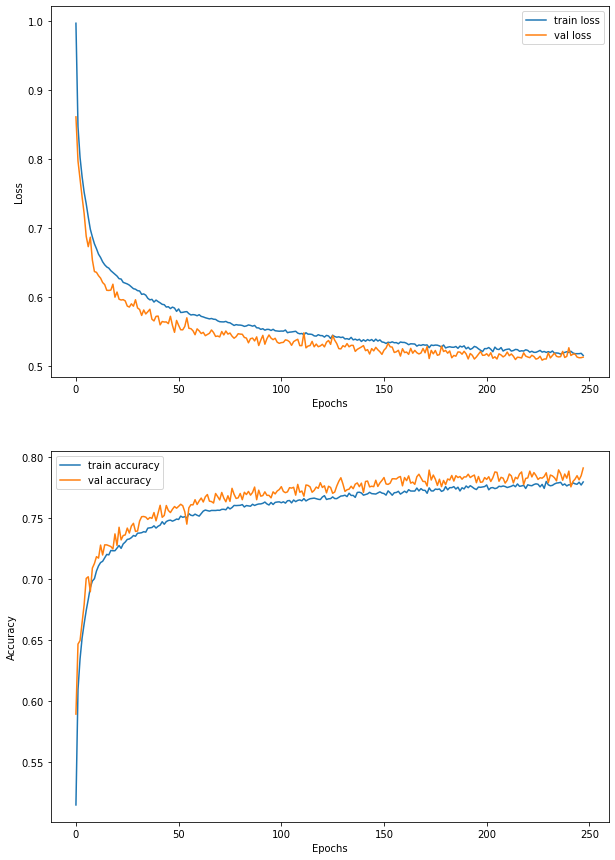

In [77]:
import matplotlib.pyplot as plt

train_loss = history_model2_Tomek.history['loss']
val_loss = history_model2_Tomek.history['val_loss']
train_accuracy = history_model2_Tomek.history['accuracy']
val_accuracy = history_model2_Tomek.history['val_accuracy']
val_precision = history_model2_Tomek.history['val_precision']
val_recall = history_model2_Tomek.history['val_recall']

fig, axs = plt.subplots(2, figsize=(10,15))

axs[0].plot(train_loss, label='train loss')
axs[0].plot(val_loss, label='val loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(train_accuracy, label='train accuracy')
axs[1].plot(val_accuracy, label='val accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()


plt.show()

### 2) Neural netowork trained on SMOTEENN dataset

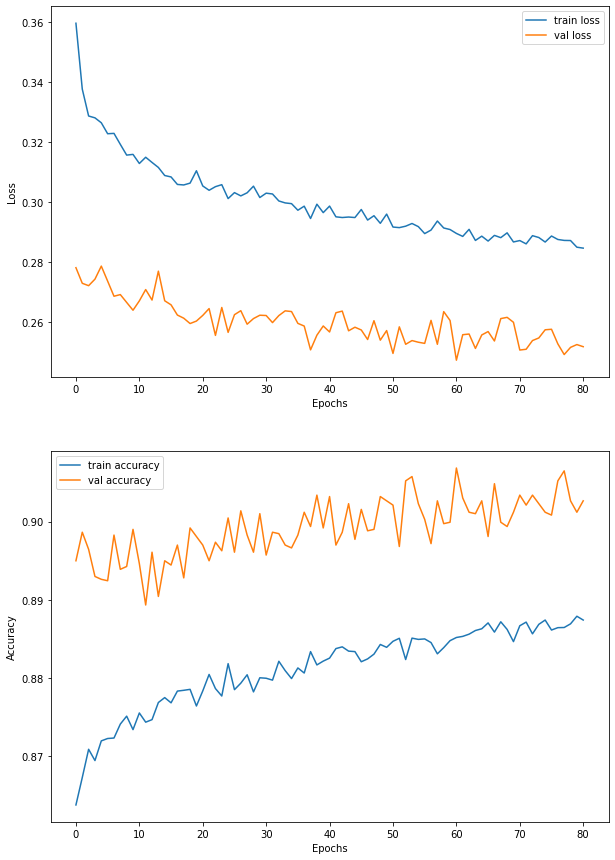

In [78]:
import matplotlib.pyplot as plt

train_loss = history_model2_ENN.history['loss']
val_loss = history_model2_ENN.history['val_loss']
train_accuracy = history_model2_ENN.history['accuracy']
val_accuracy = history_model2_ENN.history['val_accuracy']
val_precision = history_model2_ENN.history['val_precision']
val_recall = history_model2_ENN.history['val_recall']

fig, axs = plt.subplots(2, figsize=(10,15))

axs[0].plot(train_loss, label='train loss')
axs[0].plot(val_loss, label='val loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(train_accuracy, label='train accuracy')
axs[1].plot(val_accuracy, label='val accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()


plt.show()


### Confusion matrix of the neural network model trained on SMOTEENN

172/172 [==============================] - 0s 579us/step


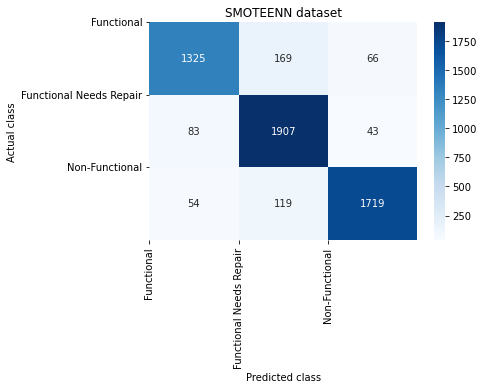

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# This contains 3 columns where each one has a probability of the prediction of this clas
y_pred_enn_nn = nn4.predict(X_val_res)
# Convert it to having ONLY 1 column containing the class with the highest probability prediction
y_pred_enn_labels = np.argmax(y_pred_enn_nn, axis=1)
# We will do the same for the validation true dataset -> 1 column having only the label of the predicted class
y_val_res_one_col = np.argmax(y_val_res.values, axis=1)

# Initiate a confusion matrix for both datasets
cm_enn_nn = confusion_matrix(y_val_res_one_col, y_pred_enn_labels)
labels = ["Functional", "Functional Needs Repair", "Non-Functional"]

# Heatmap for ENN dataset
sns.heatmap(cm_enn_nn, annot=True, cmap="Blues", fmt="d")
plt.title("SMOTEENN dataset")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.xticks(ticks=range(3), labels=labels, rotation=90)
plt.yticks(ticks=range(3), labels=labels, rotation=0)
plt.show()


# Transformation of Test data
### 1) Drop unnecessary columns

In [80]:
# Dropping of Unuseful and redundant features
# Further dropping of features
drop_cols = ['funder', 'installer','wpt_name', 'ward', 'latitude', 'population', 'management','management_group','public_meeting','public_meeting','permit', 'funder','basin' , 'subvillage', 'district_code','scheme_management', 'scheme_name', 'amount_tsh','num_private','date_recorded','recorded_by','extraction_type_group','extraction_type_class','payment_type', 'water_quality','quantity_group','source_type', 'waterpoint_type_group']
X_test = X_test.drop(drop_cols, axis=1)
X_test.head()

,id,gps_height,longitude,region,region_code,lga,construction_year,extraction_type,payment,quality_group,quantity,source,source_class,waterpoint_type
0,60854,1251,38.467481,Tanga,4,Lushoto,2008,gravity,never pay,good,enough,spring,groundwater,communal standpipe
1,48328,0,31.472389,Kagera,18,Bukoba Urban,0,gravity,never pay,good,enough,spring,groundwater,improved spring
2,28533,1512,34.747722,Singida,13,Singida Urban,2009,india mark ii,never pay,good,seasonal,machine dbh,groundwater,hand pump
3,1755,947,37.341250,Kilimanjaro,3,Moshi Rural,1972,gravity,never pay,good,insufficient,spring,groundwater,communal standpipe
4,61993,-7,38.994109,Pwani,6,Bagamoyo,1990,ksb,pay per bucket,good,enough,river,surface,communal standpipe


## 2) Apply label encoding

In [81]:
#Label Encoding 
# Choosing the columns to label encode. Note, they are less than those present in training because we dropped some of them later.
missing_cols = list(set(label_encoding_columns) - set(X_test.columns))
# We need to add missing columns because the ordinal encoder needs to transform test dataset on the same columns it was fit on.
# We are going to add those columns with dummy variable (0) and then remove them afterwards.
to_delete = []
for col in missing_cols: 
    X_test[col] = '0'
    to_delete.append(col)
X_test[label_encoding_columns] = ordinal_encoder.transform(X_test[label_encoding_columns])
X_test = X_test.drop(to_delete, axis=1)

In [82]:
X_test.head()

,id,gps_height,longitude,region,region_code,lga,construction_year,extraction_type,payment,quality_group,quantity,source,source_class,waterpoint_type
0,60854,1251,38.467481,20.0,4,52.0,2008,3.0,0.0,2.0,enough,8.0,groundwater,1.0
1,48328,0,31.472389,4.0,18,8.0,0,3.0,0.0,2.0,enough,8.0,groundwater,5.0
2,28533,1512,34.747722,18.0,13,110.0,2009,4.0,0.0,2.0,seasonal,3.0,groundwater,4.0
3,1755,947,37.341250,6.0,3,73.0,1972,3.0,0.0,2.0,insufficient,8.0,groundwater,1.0
4,61993,-7,38.994109,14.0,6,3.0,1990,6.0,4.0,2.0,enough,6.0,surface,1.0


## 3) Apply one-hot encoding

In [83]:
missing_cols = list(set(one_hot_columns) - set(X_test.columns))
to_delete = []
for col in missing_cols:
    X_test[col] = '0'
    to_delete.append(col) 
encoded_arr = one_hot.transform(X_test[one_hot_columns])
col_names = one_hot.get_feature_names_out(one_hot_columns) 
appropriate_encoded_cols = pd.DataFrame(encoded_arr.toarray(), columns=col_names)
appropriate_encoded_cols.drop(columns=['public_meeting_nan'], inplace=True)
# Drop previous columns and add new one hot encoded columns instead
# Notice some of the columns will contain colnamne_nan. These columns are dropped later
X_test = pd.concat([X_test.drop(columns=one_hot_columns, axis=1).reset_index(drop=True), appropriate_encoded_cols], axis=1)
# Also delete the one_hot encoded columns from to_delete
X_test.drop(columns=['public_meeting_False', 'public_meeting_True', 'permit_False', 'permit_True'], inplace=True)

In [84]:
X_test.head()

,id,gps_height,longitude,region,region_code,lga,construction_year,extraction_type,payment,quality_group,source,waterpoint_type,source_class_groundwater,source_class_surface,source_class_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,60854,1251,38.467481,20.0,4,52.0,2008,3.0,0.0,2.0,8.0,1.0,1,0,0,0,1,0,0,0
1,48328,0,31.472389,4.0,18,8.0,0,3.0,0.0,2.0,8.0,5.0,1,0,0,0,1,0,0,0
2,28533,1512,34.747722,18.0,13,110.0,2009,4.0,0.0,2.0,3.0,4.0,1,0,0,0,0,0,1,0
3,1755,947,37.341250,6.0,3,73.0,1972,3.0,0.0,2.0,8.0,1.0,1,0,0,0,0,1,0,0
4,61993,-7,38.994109,14.0,6,3.0,1990,6.0,4.0,2.0,6.0,1.0,0,1,0,0,1,0,0,0


## 4) Construction year contains alot of zeros (like training dataset). Impute by KNN

In [85]:
X_test['construction_year'] = X_test['construction_year'].replace(0, np.nan)
#Construction year has correlations with funder, region, lga, quantity_dry, quantity_enough
impute_df = X_test[['construction_year', 'region','lga','quantity_dry', 'quantity_enough']]
imputer = KNNImputer(n_neighbors=1)
imputed_construction_year = imputer.fit_transform(impute_df)
X_test['construction_year'] = imputed_construction_year[:,0]
X_test.head()

,id,gps_height,longitude,region,region_code,lga,construction_year,extraction_type,payment,quality_group,source,waterpoint_type,source_class_groundwater,source_class_surface,source_class_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,60854,1251,38.467481,20.0,4,52.0,2008.0,3.0,0.0,2.0,8.0,1.0,1,0,0,0,1,0,0,0
1,48328,0,31.472389,4.0,18,8.0,2011.0,3.0,0.0,2.0,8.0,5.0,1,0,0,0,1,0,0,0
2,28533,1512,34.747722,18.0,13,110.0,2009.0,4.0,0.0,2.0,3.0,4.0,1,0,0,0,0,0,1,0
3,1755,947,37.341250,6.0,3,73.0,1972.0,3.0,0.0,2.0,8.0,1.0,1,0,0,0,0,1,0,0
4,61993,-7,38.994109,14.0,6,3.0,1990.0,6.0,4.0,2.0,6.0,1.0,0,1,0,0,1,0,0,0


## 6) Apply MinMax standardization

In [86]:
X_test[scaling_cols] = min_max_scaler.transform(X_test[scaling_cols])
X_test.head()

,id,gps_height,longitude,region,region_code,lga,construction_year,extraction_type,payment,quality_group,source,waterpoint_type,source_class_groundwater,source_class_surface,source_class_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,60854,0.463819,0.953459,20.0,4,52.0,0.905660,3.0,0.0,2.0,8.0,1.0,1,0,0,0,1,0,0,0
1,48328,0.022238,0.780078,4.0,18,8.0,0.962264,3.0,0.0,2.0,8.0,5.0,1,0,0,0,1,0,0,0
2,28533,0.555948,0.861261,18.0,13,110.0,0.924528,4.0,0.0,2.0,3.0,4.0,1,0,0,0,0,0,1,0
3,1755,0.356513,0.925544,6.0,3,73.0,0.226415,3.0,0.0,2.0,8.0,1.0,1,0,0,0,0,1,0,0
4,61993,0.019767,0.966512,14.0,6,3.0,0.566038,6.0,4.0,2.0,6.0,1.0,0,1,0,0,1,0,0,0


## 7) Encoding target variable

In [87]:
y_test.drop(columns='id', inplace=True)

In [88]:
# Encode target feature
status_group_2d = np.array(y_test).reshape(-1, 1)
encoded_arr = one_hot_target.transform(status_group_2d)
col_names = one_hot_target.get_feature_names_out()
y_test = pd.DataFrame(encoded_arr.toarray(), columns=col_names)
y_test.rename(columns={"x0_functional": "functional", "x0_functional needs repair": "functional needs repair", "x0_non functional": "non functional"}, inplace=True)

In [89]:
y_test.head()

,functional,functional needs repair,non functional
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [90]:
X_test.drop(columns='id', inplace=True)

In [91]:
np.argmax(y_test.values, axis=1)[0:3]

array([0, 0, 2], dtype=int64)

In [92]:
nn3.predict(X_test)

186/186 [==============================] - 0s 607us/step


array([[5.6771910e-01, 8.5321404e-02, 3.4695956e-01],
       [7.7125794e-01, 2.0651361e-01, 2.2228407e-02],
       [9.7145557e-01, 2.1641908e-02, 6.9024810e-03],
       ...,
       [4.8279214e-01, 1.8471706e-01, 3.3249074e-01],
       [9.7526962e-01, 2.4568481e-02, 1.6198511e-04],
       [4.7444660e-02, 1.6099676e-02, 9.3645567e-01]], dtype=float32)

### PREDICTIONS on TEST dataset

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
models = [best_xgb,best_xgb2,nn3,nn4]
results = []

y_test_one_col = np.argmax(y_test.values, axis=1)

for i, model in enumerate(models):
    # Take care xgboost outputs one label indicating the predicted class (That's how we trained it during fit) while neural networks output a probability distribution using softmax
    
    # Predict the test set using model
    y_pred = model.predict(X_test)
    
    if model in [nn3, nn4]:
        y_pred = np.argmax(y_pred, axis=1)
    
    # Calculate the accuracy, precision, and recall
    accuracy = accuracy_score(y_test_one_col, y_pred)
    precision = precision_score(y_test_one_col, y_pred, average='macro')
    recall = recall_score(y_test_one_col, y_pred, average='macro')
    
    results.append((i+1, accuracy, precision, recall))

for r in results:
    print(f"Model {r[0]}: Accuracy = {r[1]:.4f}, Precision = {r[2]:.4f}, Recall = {r[3]:.4f}")


186/186 [==============================] - 0s 578us/step
Model 1: Accuracy = 0.7677, Precision = 0.6641, Recall = 0.6708
Model 2: Accuracy = 0.7334, Precision = 0.6358, Recall = 0.6939
Model 3: Accuracy = 0.6636, Precision = 0.6049, Recall = 0.6747
Model 4: Accuracy = 0.6636, Precision = 0.6049, Recall = 0.6747


In [94]:
X_test.head()

,gps_height,longitude,region,region_code,lga,construction_year,extraction_type,payment,quality_group,source,waterpoint_type,source_class_groundwater,source_class_surface,source_class_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,0.463819,0.953459,20.0,4,52.0,0.905660,3.0,0.0,2.0,8.0,1.0,1,0,0,0,1,0,0,0
1,0.022238,0.780078,4.0,18,8.0,0.962264,3.0,0.0,2.0,8.0,5.0,1,0,0,0,1,0,0,0
2,0.555948,0.861261,18.0,13,110.0,0.924528,4.0,0.0,2.0,3.0,4.0,1,0,0,0,0,0,1,0
3,0.356513,0.925544,6.0,3,73.0,0.226415,3.0,0.0,2.0,8.0,1.0,1,0,0,0,0,1,0,0
4,0.019767,0.966512,14.0,6,3.0,0.566038,6.0,4.0,2.0,6.0,1.0,0,1,0,0,1,0,0,0


In [95]:
X_train_res.head()

,gps_height,longitude,region,region_code,lga,construction_year,extraction_type,payment,quality_group,source,waterpoint_type,source_class_groundwater,source_class_surface,source_class_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
27329,0.464606,0.930088,6,3,73,0.715879,3,0,2,8,1,1,0,0,0,0,1,0,0
22997,0.544606,0.907692,0,2,50,0.339623,3,1,2,8,1,1,0,0,0,0,1,0,0
6072,0.022238,0.825106,10,12,60,0.886792,3,5,2,6,1,0,1,0,0,1,0,0,0
52000,0.022238,0.826223,13,19,54,0.830189,9,0,4,7,6,1,0,0,1,0,0,0,0
3210,0.459936,0.751639,5,16,28,0.811321,3,3,2,8,1,1,0,0,0,1,0,0,0


In [96]:
## Check whether the features in the test set has the same distribution of those in the training set

<AxesSubplot:xlabel='gps_height', ylabel='Count'>

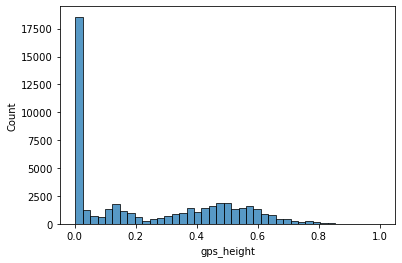

In [97]:
sns.histplot(X_train_res['gps_height'])

<AxesSubplot:xlabel='gps_height', ylabel='Count'>

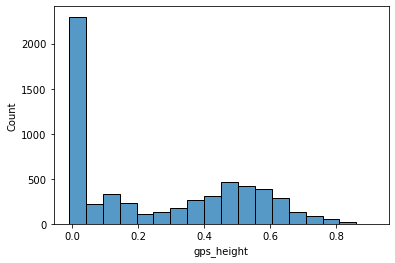

In [98]:
sns.histplot(X_test['gps_height'])

<AxesSubplot:ylabel='Count'>

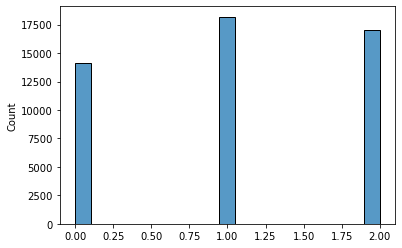

In [99]:
# Distribution of class labels in train dataset:
sns.histplot(np.argmax(y_train_res.values, axis=1))

<AxesSubplot:ylabel='Count'>

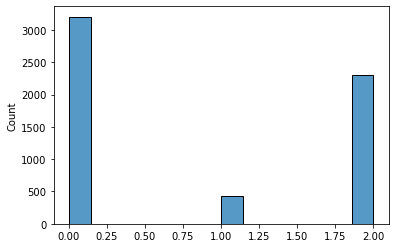

In [100]:
# Distribution of class labels in test dataset:
sns.histplot(y_test_one_col)

### Confusion matrices on test dataset

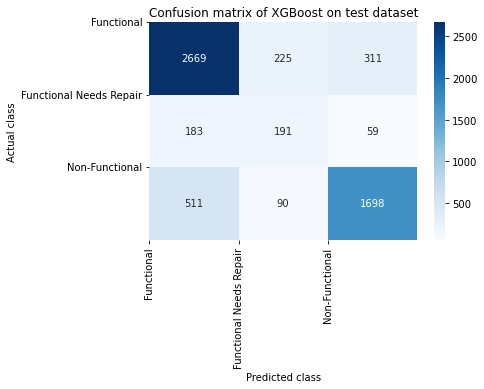

186/186 [==============================] - 0s 604us/step


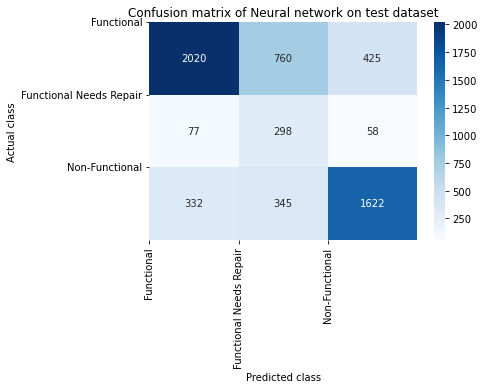

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
models = [best_xgb, nn3]

labels = ["Functional", "Functional Needs Repair", "Non-Functional"]
y_test_one_col = np.argmax(y_test.values, axis=1)

for i, model in enumerate(models):
    # Take care xgboost outputs one label indicating the predicted class (That's how we trained it during fit) while neural networks output a probability distribution using softmax
    
    # Predict the test set using model
    y_pred_test = model.predict(X_test)
    
    if model in [nn3]:
        y_pred_test = np.argmax(y_pred_test, axis=1)
    
    # Initiate a confusion matrix for both models (XGBOOST and NN trained on ENN) on the TEST dataset
    cm = confusion_matrix(y_test_one_col, y_pred_test)

    # Heatmaps for test datasets using 2 different models (xgboost and neural network)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    if model in [best_xgb]:
        plt.title("Confusion matrix of XGBoost on test dataset")
    elif model in [nn3]:
        plt.title("Confusion matrix of Neural network on test dataset")
    plt.xlabel("Predicted class")
    plt.ylabel("Actual class")
    # Rotated the lables in order not to overlap
    plt.xticks(ticks=range(3), labels=labels, rotation=90)
    plt.yticks(ticks=range(3), labels=labels, rotation=0)
    plt.show()